# Relationship between age and income

The goal is to investigate the relationship between age and income using US census data. The target of inference is the linear regression coefficient when regressing yearly income in dollars on age, while controlling for sex. The data from California in the year 2019 is downloaded through the Folktables interface (1). Predictions of income are made by training a gradient boosting tree via XGBoost (2) on the previous year’s data.

1. F. Ding, M. Hardt, J. Miller, L. Schmidt, “Retiring adult: New datasets for fair machine learning” in Advances in Neural Information Processing Systems 34 (2021), pp. 6478–6490.
2. T. Chen, C. Guestrin, “XGBoost: A scalable tree boosting system” in Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (2016), pp. 785–794.

### Import necessary packages

In [1]:
import numpy as np
from ppi_py.datasets import load_dataset
from ppi_py import analyze_dataset, plot_cpp

Split 1: Y range from -21421.84765625 to 0.04190260171890259
Split 2: Y range from 0.04190260171890259 to 14424.25
Split 3: Y range from 14424.5830078125 to 31821.640625
Split 4: Y range from 31822.521484375 to 56306.28125
Split 5: Y range from 56306.73828125 to 197141.75
分组： 1
带标签的样本量： 136
不带标签的样本量： 75883
分组： 2
带标签的样本量： 136
不带标签的样本量： 75882
分组： 3
带标签的样本量： 136
不带标签的样本量： 75882
分组： 4
带标签的样本量： 136
不带标签的样本量： 75882
分组： 5
带标签的样本量： 136
不带标签的样本量： 75882
带标签的样本量： 680
不带标签的样本量： 379411

最终结果：
真实 theta: 937.5318947805291
CPP intervals: [array([-43.88132633,  59.96588253]), array([164.79482943, 329.06330146]), array([529.32441184, 807.93370207]), array([ 751.18710644, 1775.51944566]), array([1527.90773767, 2954.36521081])]
组合数据的置信区间: [ 726.04231491 1045.19002393]
联邦聚合后的置信区间: [ 469.14567214 1302.08577046]
Updated CSV file 'parameters.csv' successfully.


meta NOT subset; don't know how to subset; dropped


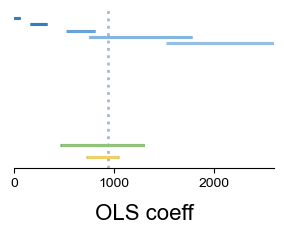

In [2]:
# 示例调用
dataset_name = "census_income"
data = load_dataset('./data/', dataset_name)
Y_total = data["Y"]
Yhat_total = data["Yhat"]
X_total = data["X"]

alpha = 0.05

method = "linear"

# dataset_dist = 'IID'
dataset_dist = 'Non-IID'

# num_ratio = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
num_ratio = [1, 1, 1, 1, 1]  # 数据量分布平衡
# num_ratio = [1,2,3,3,1]  # 数据量分布不平衡

# 计算标注真实值、各节点上、组合数据后和FL后的平均值cpp
true_theta, cpp_intervals, ppi_ci_combined, mean_cpp = analyze_dataset(alpha, X_total, Y_total, Yhat_total, dataset_dist,
                                                                            num_ratio, method, grid=None)
# 画图
file_name = dataset_dist + '-' + dataset_name + '.pdf'
xlim = [0, 2600]
ylim = [0, 1.0]
title = "OLS coeff"
plot_cpp(true_theta, cpp_intervals, ppi_ci_combined, mean_cpp, file_name, xlim, ylim, title)